# Gaussian Beam Spillover calculations

In this notebook we relate f/# (to the stop), horn diameter (defining the Gaussian beam waist), edge taper, and spillover fraction.  

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [10, 6]
c = 3e8

# Gaussian beam plot - find the lenslet waist factor
Let's plot a gaussian beam;  in this case, let's try to figure out what waist factor (wf) we should use for a given sinuous-antenna + lenslet pixel.  In Toki Suzuki's presentation to CMB-S4 in Feb 2020, he showed a simulation that showed an 8.6mm pixel-pitch lenslet giving a beam that was -6.2dB at a half angle of 17.9deg.

This was for a Silcon lenslet diameter about 0.6mm less than the pixel-pitch, to accomodate the AR coat.

The normalized beam power at 17.9 degrees should then be
$$ P = 10^{(-6.2/10)} = 0.24$$

Playing around with wf in the cell below shows that wf=2.7 gives a good result.

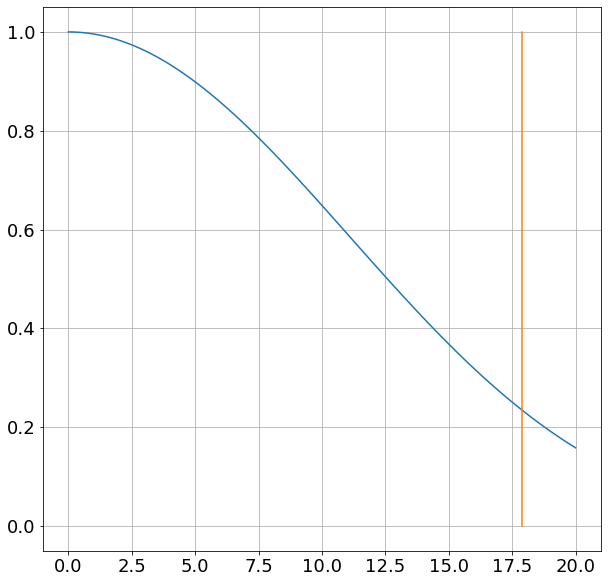

In [78]:
# Gaussian beam
D_si = 8.6 - 0.6
wf=2.7
w0 = D_si/wf
n = 1
lam = 300/85. #mm
theta_deg = np.linspace(0,20,100)
theta = theta_deg*np.pi/180.
I = np.exp((-2*(np.pi*n*w0*np.tan(theta))**2)/lam**2)

# Angle of f/#
#tantheta = 0.5/F
#theta_stop = np.arctan(tantheta)
#theta_stop_deg = theta_stop*180/np.pi
theta_stop_deg = 17.9

plt.plot(theta_deg,I)
plt.plot([theta_stop_deg, theta_stop_deg], [0,1])
#plt.ylim(0,.3)
plt.grid()


# Beam plot
Gaussian beams:

$$ I(r,z) = I_0 \left(\frac{w_0}{w(z)}\right)^2 \exp\left(\frac{-2r^2}{w(z)^2}\right)$$

$$ w(z) = w_0 \sqrt{1 + \left(\frac{z}{z_R}\right)^2} $$

$$z_R = \frac{\pi w_0^2 n}{\lambda} $$

But, if we go far from the horn ($z \gg z_R$), then

$$ w(z) \approx w_0 \frac{z}{z_R} = \frac{\lambda }{\pi n w_0} z $$

so that

$$ I(r,z) \propto \exp\left(\frac{-2 \pi^2 n^2 w_0^2 r^2}{\lambda^2 z^2}\right)$$ .

Using $\tan\theta = r/z$, we have

$$ I(r,z) \propto \exp\left(\frac{-2 \pi^2 n^2 w_0^2 \tan^2\theta}{\lambda^2}\right)$$ .



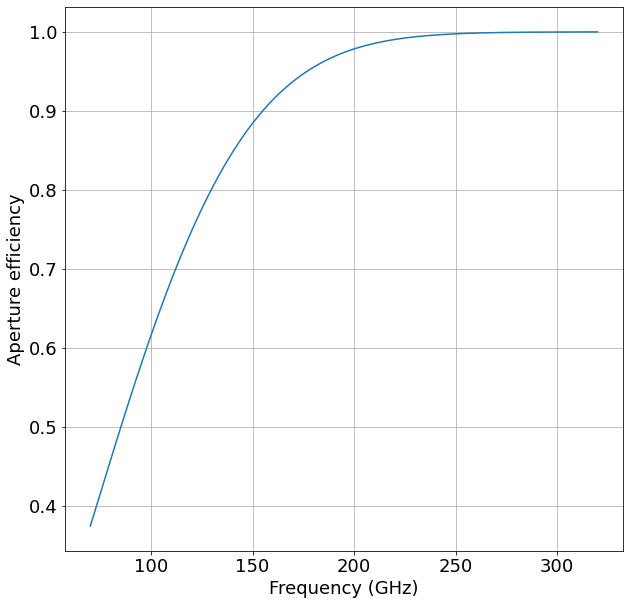

In [79]:
Dpix = 5.0 #mm
#F = 1.66   # f/# at wafer
F = 1.4
wf = 2.7  # waist factor (gaussian waist = Dpix/wf)

nu_ghz = np.linspace(70,320,1000)

lam_mm = 1000*c/(nu_ghz*1e9)
abs_stop = np.exp(-0.5*((np.pi*Dpix)/(F*lam_mm*wf))**2)
eff_stop = 1-abs_stop
plt.plot(nu_ghz,eff_stop)
plt.xlabel('Frequency (GHz)')
plt.ylabel('Aperture efficiency')
plt.grid()

# Now, using that waist factor, let's plot SPT-3g's lenslet beams.
These lenslets have a silicon diameter of 5.0mm (AR coat is in addition to that).

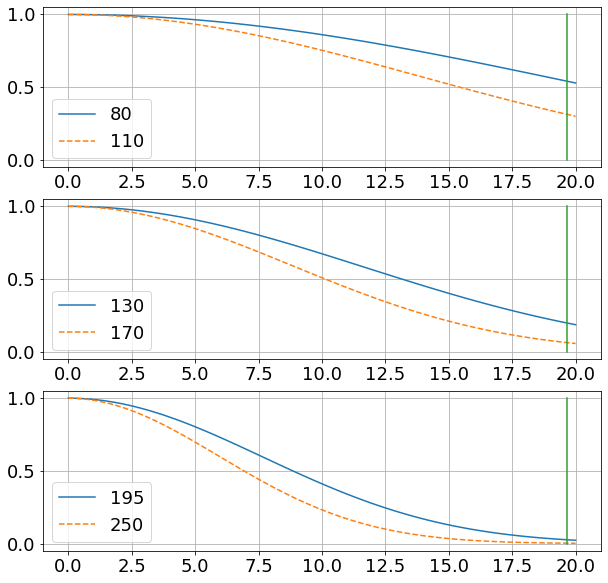

In [80]:
plt.rcParams['figure.figsize'] = [10, 10]
F = 1.4
D_si = 5.0
wf=2.7
w0 = D_si/wf
n = 1
theta_deg = np.linspace(0,20,100)
theta = theta_deg*np.pi/180.

# Angle of f/#
tantheta = 0.5/F
theta_stop = np.arctan(tantheta)
theta_stop_deg = theta_stop*180/np.pi

nu_vec = [80,110,130,170,195,250]
for ii in range(3):
    plt.subplot(3,1,ii+1)
    nu = nu_vec[2*ii]
    lam = 300/nu #mm
    I = np.exp((-2*(np.pi*n*w0*np.tan(theta))**2)/lam**2)
    plt.plot(theta_deg,I,label=str(nu))
    nu = nu_vec[2*ii+1]
    lam = 300/nu #mm
    I = np.exp((-2*(np.pi*n*w0*np.tan(theta))**2)/lam**2)
    plt.plot(theta_deg,I,'--',label=str(nu))
    plt.plot([theta_stop_deg, theta_stop_deg], [0,1])
    plt.legend()
    plt.grid()






In [46]:
10*np.log10(.23)

-6.38272163982407

In [74]:
5.0/(1.4*300/147.)

1.75

In [75]:
!ls

2D_map_psds.ipynb                 Millimeter-wave_dielectrics.ipynb
Cross-correlations.ipynb          NoiseCrossTerms.ipynb
Diffraction.ipynb                 PolarizationMath.ipynb
DrawingHexPatterns.ipynb          TES Bolomters-tau_vs_Psat.ipynb
GaussianBeamSpillover.ipynb       Untitled.ipynb
MechanicalStuff.ipynb


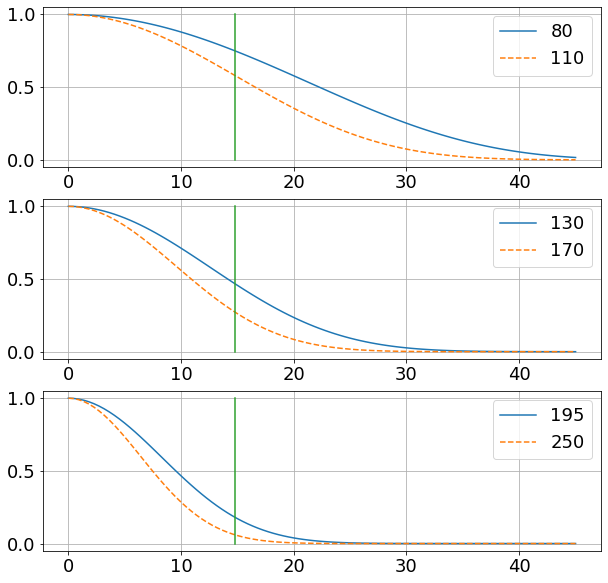

In [7]:
plt.rcParams['figure.figsize'] = [10, 10]
F = 1.9
D_horn = 5.3-0.15
wf=3.0
w0 = D_horn/wf
n = 1
theta_deg = np.linspace(0,45,100)
theta = theta_deg*np.pi/180.

# Angle of f/#
tantheta = 0.5/F
theta_stop = np.arctan(tantheta)
theta_stop_deg = theta_stop*180/np.pi

nu_vec = [80,110,130,170,195,250]
for ii in range(3):
    plt.subplot(3,1,ii+1)
    nu = nu_vec[2*ii]
    lam = 300/nu #mm
    I = np.exp((-2*(np.pi*n*w0*np.tan(theta))**2)/lam**2)
    plt.plot(theta_deg,I,label=str(nu))
    nu = nu_vec[2*ii+1]
    lam = 300/nu #mm
    I = np.exp((-2*(np.pi*n*w0*np.tan(theta))**2)/lam**2)
    plt.plot(theta_deg,I,'--',label=str(nu))
    plt.plot([theta_stop_deg, theta_stop_deg], [0,1])
    plt.legend()
    plt.grid()